In [57]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import joblib

In [58]:
# Step 1: Load the images from the "train" and "test" folders and preprocess 
def load_images(folder_path):
    images = []
    labels = []
    
    for file_name in os.listdir(folder_path):
        image_path = os.path.join(folder_path, file_name)
        label = file_name.split('.')[0]  
        
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale 
        
        
        images.append(image)
        labels.append(label)
    
    return images, labels

train_folder = 'D:\\computer_vission\\growAI_task\\anandu_kc\\split_data\\train'
test_folder = 'D:\\computer_vission\\growAI_task\\anandu_kc\\split_data\\test'    

train_images, train_labels = load_images(train_folder)
test_images, test_labels = load_images(test_folder)

In [59]:
# Step 2: Extract facial features 
# CNN model for feature extraction

# Preprocess the images for CNN input
input_shape = (64, 64, 1) 
train_images = np.array([cv2.resize(image, input_shape[:2]) for image in train_images])
test_images = np.array([cv2.resize(image, input_shape[:2]) for image in test_images])

# Normalize the images to the range [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0

In [60]:
# Step 3: Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [63]:
# Step 4: Train a machine learning model 
#  train both an SVM classifier and a CNN classifier for comparison

# SVM Classifier
svm_classifier = SVC()
svm_classifier.fit(X_train.reshape(X_train.shape[0], -1), y_train)

# CNN Classifier
num_classes = len(np.unique(train_labels + test_labels))
y_train_encoded = to_categorical(y_train, num_classes=num_classes)
y_val_encoded = to_categorical(y_val, num_classes=num_classes)

cnn_classifier = Sequential()
cnn_classifier.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
cnn_classifier.add(MaxPooling2D((2, 2)))
cnn_classifier.add(Flatten())
cnn_classifier.add(Dense(128, activation='relu'))
cnn_classifier.add(Dense(num_classes, activation='softmax'))
cnn_classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = cnn_classifier.fit(X_train, y_train_encoded, validation_data=(X_val, y_val_encoded), epochs=10, batch_size=32, verbose=1)

Epoch 1/10
3/3 [==============================] - 2s 333ms/step - loss: 5.5351 - accuracy: 0.0000e+00 - val_loss: 5.6035 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 1s 164ms/step - loss: 5.1902 - accuracy: 0.0125 - val_loss: 5.5715 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 1s 206ms/step - loss: 5.0991 - accuracy: 0.0125 - val_loss: 5.6411 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 1s 183ms/step - loss: 5.0243 - accuracy: 0.0125 - val_loss: 5.7423 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 0s 161ms/step - loss: 4.9581 - accuracy: 0.0250 - val_loss: 5.9268 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 0s 171ms/step - loss: 4.8657 - accuracy: 0.0250 - val_loss: 6.1898 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 0s 168ms/step - loss: 4.8079 - accuracy: 0.0250 - val_loss: 6.4367 - val_accuracy:

In [64]:
# Step 5: Evaluate the models' accuracy on the validation set
# SVM Classifier
svm_val_predictions = svm_classifier.predict(X_val.reshape(X_val.shape[0], -1))
svm_val_accuracy = accuracy_score(y_val, svm_val_predictions)

# CNN Classifier
cnn_val_predictions = np.argmax(cnn_classifier.predict(X_val), axis=1)
cnn_val_accuracy = accuracy_score(np.argmax(y_val_encoded, axis=1), cnn_val_predictions)

print("SVM Validation Accuracy:", svm_val_accuracy)
print("CNN Validation Accuracy:", cnn_val_accuracy)

1/1 [==============================] - 0s 217ms/step
SVM Validation Accuracy: 0.0
CNN Validation Accuracy: 0.0


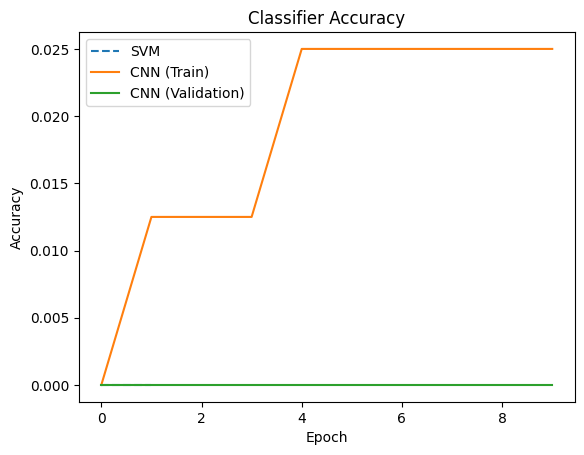

In [65]:
# Step 6: Plot the accuracy throughout the training process using matplotlib
# Plot the accuracy of the SVM classifier
plt.plot([0, 1], [svm_val_accuracy, svm_val_accuracy], label='SVM', linestyle='dashed')
# Plot the accuracy of the CNN classifier
plt.plot(history.history['accuracy'], label='CNN (Train)')
plt.plot(history.history['val_accuracy'], label='CNN (Validation)')
plt.title('Classifier Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [67]:

# Saving the trained CNN classifier model
cnn_model_path = 'D:\\computer_vission\\growAI_task\\cnn_face_recognition_model'
cnn_classifier.save(cnn_model_path)
print("CNN classifier model saved successfully.")


# Saving the trained SVM classifier model
svm_model_path = 'D:\\computer_vission\\growAI_task\\svm_face_recognition_model.pkl'
joblib.dump(svm_classifier, svm_model_path, compress=3)
print("SVM classifier model saved successfully.")



INFO:tensorflow:Assets written to: D:\computer_vission\growAI_task\cnn_face_recognition_model\assets


INFO:tensorflow:Assets written to: D:\computer_vission\growAI_task\cnn_face_recognition_model\assets


CNN classifier model saved successfully.
SVM classifier model saved successfully.
